In [1]:
import os
os.chdir("../")

In [53]:
from comchoice.datasets import from_preflib
from comchoice.aggregate import borda, divisiveness, win_rate

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# TODO
nodes, edges = from_preflib("https://www.preflib.org/static/data/agh/00009-00000001.soc")
nodes

,alternative,name
0,1,Course 1
1,2,Course 2
2,3,Course 3
3,4,Course 4
4,5,Course 5
5,6,Course 6
6,7,Course 7
7,8,Course 8
8,9,Course 9


In [34]:
edges.head()

,ballot,voters
0,9>2>5>6>7>8>4>3>1,4
1,9>1>3>4>6>5>8>2>7,4
2,9>3>5>6>8>2>7>4>1,3
3,9>3>4>5>6>2>7>8>1,2
4,9>2>3>4>6>5>1>8>7,2


In [40]:
edges1 = edges.head(2)
edges1

,ballot,voters
0,9>2>5>6>7>8>4>3>1,4
1,9>1>3>4>6>5>8>2>7,4


In [35]:
edges.shape

(123, 2)

In [29]:
print(nodes.to_dict(orient="records"))

[{'alternative': '1', 'name': 'Berankova Dlabola'}, {'alternative': '2', 'name': 'Filonenko Marchenko'}, {'alternative': '3', 'name': 'Nekrassova Mintals'}, {'alternative': '4', 'name': 'Rodionova Anichenko'}, {'alternative': '5', 'name': 'Kazakova Dmitriev'}, {'alternative': '6', 'name': 'Asanaki Mckeever'}, {'alternative': '7', 'name': 'Abitbol Bernadis'}, {'alternative': '8', 'name': 'Zagorska Siudek'}, {'alternative': '9', 'name': 'Bestandigova Bestandig'}, {'alternative': '10', 'name': 'Berezhnaya Sikharulidze'}, {'alternative': '11', 'name': 'Obertas Palamarchuk'}, {'alternative': '12', 'name': 'Krasiltseva Chestnikh'}, {'alternative': '13', 'name': 'Schwarz Muller'}, {'alternative': '14', 'name': 'Poluliaschenko Seabrook'}]


In [70]:
df_dv = divisiveness(
    edges1,
    convert_pairwise=True,
    convert_pairwise_kws=dict(dtype = "ballot"),
    method=win_rate
)

df_dv

100%|██████████| 59/59 [00:01<00:00, 32.63it/s]
C:\Users\cnava\AppData\Local\Temp\ipykernel_36544\1312076322.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dv = df_dv.append({


,alternative,value,rank
0,1,0.875,1
1,2,0.750,2
2,3,0.625,3
3,7,0.500,4
4,4,0.375,5
5,5,0.375,5
6,6,0.125,7
7,8,0.125,7
8,9,0.000,9


In [71]:
dv_ag = borda(edges1)
dv_ag

,alternative,value,rank
8,9,64,1
4,5,36,2
5,6,36,2
1,2,32,4
0,1,28,5
2,3,28,5
3,4,28,5
7,8,20,8
6,7,16,9


In [76]:
data

,alternative,value_x,rank_x,value_y,rank_y
0,1,0.875,1.0,28.0,5.0
1,2,0.750,2.0,32.0,4.0
2,3,0.625,3.0,28.0,5.0
3,7,0.500,4.0,16.0,9.0
4,4,0.375,5.0,28.0,5.0
5,5,0.375,5.0,36.0,2.0
6,6,0.125,7.0,36.0,2.0
7,8,0.125,7.0,20.0,8.0
8,9,0.000,9.0,0.0,0.0
9,9,0.000,0.0,64.0,1.0


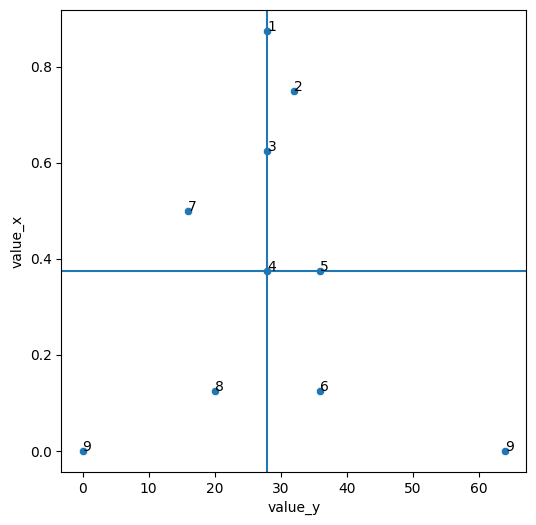

In [73]:
fig, ax = plt.subplots(figsize=(6, 6))

data = pd.merge(df_dv, dv_ag, on="alternative", how="outer").fillna(0)
g = sns.scatterplot(x="value_y", y="value_x", data=data)

plt.axvline(x=data.value_y.median())
plt.axhline(y=data.value_x.median())

for i, row in data.iterrows():
    g.text(row["value_y"], row["value_x"], row["alternative"])

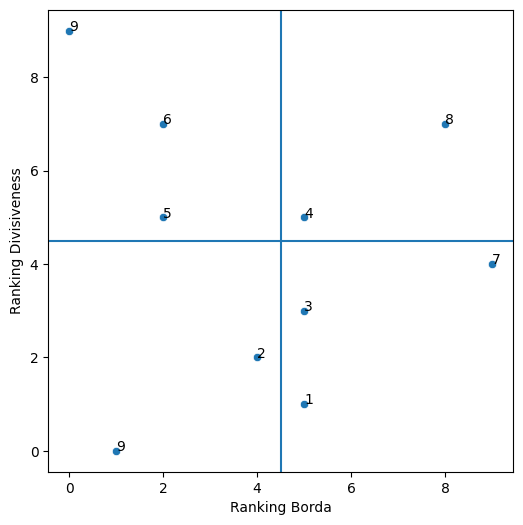

In [75]:
fig, ax = plt.subplots(figsize=(6, 6))

data = pd.merge(df_dv, dv_ag, on="alternative", how="outer").fillna(0)
g = sns.scatterplot(x="rank_y", y="rank_x", data=data)
g.set_xlabel("Ranking Borda")
g.set_ylabel("Ranking Divisiveness")
plt.axvline(x=data.rank_y.median())
plt.axhline(y=data.rank_x.median())

for i, row in data.iterrows():
    g.text(row["rank_y"], row["rank_x"], row["alternative"])

In [8]:
# df = pav(edges, n_seats=2, ballot="winners")
# df.head().to_list()